To store all the data and files in a common place we are using Google drive for this project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the stopwords from nltk library. All the necessary library have been imported, genism already has a pre-trained word2vec model that can be imported.

In [ ]:
import gensim
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, join
from gensim.models.doc2vec import TaggedDocument
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The java files have been modified into .txt files as word2vec only recognise text files. The files have been stored in a folder called Train1 to use it to train the model.

In [ ]:
docLabels = []
i=0
docLabels = [f for f in listdir("/content/drive/MyDrive/Word2vec/Train1") if 
 f.endswith('.txt')]#create a list data that stores the content of all text files in order of their names in docLabels
data = []
for doc in docLabels:
  i=i+1
  data.append(open('/content/drive/MyDrive/Word2vec/Train1/' + doc).read())

print(i)

140


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
stopword_set = set(stopwords.words('english'))
def nlp_clean(data):   
  new_data = []
  for d in data:
    new_str = d.lower()
    dlist = tokenizer.tokenize(new_str)
    dlist = list(set(dlist).difference(stopword_set))
    new_data.append(dlist)
  return new_data

In [ ]:
class LabeledLineSentence(object):    
  def __init__(self, doc_list, labels_list):        
    self.labels_list = labels_list
    self.doc_list = doc_list   
  def __iter__(self):        
    for idx, doc in enumerate(self.doc_list):
      yield gensim.models.doc2vec.LabeledSentence(doc, [self.labels_list[idx]])

In [ ]:
data = nlp_clean(data)

In [ ]:
#iterator returned over all documents
it = LabeledLineSentence(data, docLabels)
it

The blow command has been used to train the pre-trained model with new data of Genivi and AndroidAuto which was stored in the Train1 folder.

In [ ]:
model = gensim.models.Doc2Vec(size=300, min_count=0, alpha=0.025, min_alpha=0.025)
model.build_vocab(it)

model.train(it,epochs=50,total_examples=140)
model.alpha -= 0.002
model.min_alpha = model.alpha#saving the created model#
model.save('doc2vec.model')
#print 'model saved'

<ipython-input-6-ae9e9b1038b7>:7: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  yield gensim.models.doc2vec.LabeledSentence(doc, [self.labels_list[idx]])


We load the trained model to predict tthe code vector. The link below can be edited to direct to the code you want to extract the embedding.

In [ ]:
d2v_model = gensim.models.doc2vec.Doc2Vec.load('doc2vec.model')
docvec = d2v_model.infer_vector('/content/drive/MyDrive/Code2vecJava/code2vec/Test1/Singleton2.java')
docvec

array([ 0.5891727 ,  0.49105072, -0.8159055 ,  0.2553402 ,  0.21714845,
       -0.4223004 ,  0.13371882, -0.2301288 , -0.08607204,  0.30794266,
       -0.43838206, -0.4050583 , -0.3550965 , -0.02358346,  0.5177713 ,
       -0.27224034,  0.44525108,  0.18442886, -0.4612809 ,  0.10886577,
       -0.31425533,  0.34048885, -0.42680168,  0.18036672, -0.37663466,
       -0.56755435, -0.26196125, -0.35163105, -0.7626965 , -0.86708504,
        0.68666947, -1.5890099 ,  0.38723594,  0.09838286, -0.25639912,
        0.07670368,  0.01473212, -0.41616136,  1.7290859 ,  0.82843435,
        0.2362733 ,  0.5242492 ,  1.0619112 , -0.44530588, -0.32839775,
        0.14814895,  0.6609475 ,  0.67508036,  0.67732   ,  0.34077272,
       -0.68032634, -1.2820559 ,  1.0229219 , -0.6311562 ,  0.48899943,
       -2.1402583 ,  0.6466714 , -0.29059145, -1.0483518 ,  0.6565773 ,
        0.29190034, -0.19400537,  0.34494695,  0.39212805,  0.5963442 ,
        0.22951563, -0.05923483, -0.19229868, -1.0539868 ,  0.06

In [ ]:
cd ..

/


In [ ]:
cd /content/drive/MyDrive/Word2vec/

/content/drive/MyDrive/Word2vec


The embeddings have been stored into a csv file.

In [ ]:
import pandas as pd

df = pd.read_csv('word2vecvectors.csv')
df

,Singleton,Programs,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,300
0,1,Singleton1,-0.10,-0.46,-0.15,0.81,-0.31,-1.18,-2.01,0.13,...,0.74,0.95,0.45,0.06,0.98,0.07,0.10,1.05,-0.62,-1.42
1,1,Singleton2,0.07,-0.49,0.11,0.86,-0.42,-1.28,-2.03,0.07,...,0.75,0.83,0.22,0.37,1.04,0.04,0.00,1.11,-0.29,-1.47
2,1,Singleton3,-0.02,-0.62,0.05,1.06,-0.39,-1.57,-2.44,0.23,...,0.79,0.90,0.26,0.41,1.16,0.04,0.13,1.24,-0.37,-1.68
3,1,Singleton4,-0.02,-0.53,0.06,0.90,-0.45,-1.45,-2.19,0.19,...,0.68,0.90,0.12,0.40,1.26,0.01,0.10,1.18,-0.35,-1.59
4,1,Singleton5,0.17,-0.54,0.08,1.00,-0.69,-1.52,-2.08,0.10,...,0.72,0.98,-0.17,0.49,1.33,-0.14,0.05,1.29,-0.25,-1.64
5,1,Singleton6,0.10,-0.48,0.20,0.82,-0.47,-1.33,-1.97,0.05,...,0.70,0.83,0.09,0.43,1.09,-0.07,0.01,1.10,-0.23,-1.50
6,1,Singleton7,0.03,-0.56,0.06,0.83,-0.48,-1.29,-2.00,0.07,...,0.73,0.83,0.19,0.39,1.18,-0.02,0.10,1.00,-0.33,-1.44
7,1,Singleton8,0.12,-0.41,0.18,0.85,-0.60,-1.31,-1.90,-0.01,...,0.70,0.95,-0.02,0.42,1.17,-0.04,-0.03,1.23,-0.27,-1.51
8,1,Singleton9,0.11,-0.51,0.06,0.83,-0.49,-1.29,-1.94,0.01,...,0.69,0.86,0.11,0.33,1.20,0.03,0.02,1.14,-0.28,-1.34
9,1,Singleton10,0.11,-0.37,0.15,0.81,-0.59,-1.22,-1.93,-0.05,...,0.78,0.98,0.05,0.39,1.24,0.06,-0.09,1.28,-0.35,-1.64


In [ ]:
dff=df
x=df.drop(columns=["Programs"])
x

arr=x.to_numpy()
arr

array([[ 1.  , -0.1 , -0.46, ...,  1.05, -0.62, -1.42],
       [ 1.  ,  0.07, -0.49, ...,  1.11, -0.29, -1.47],
       [ 1.  , -0.02, -0.62, ...,  1.24, -0.37, -1.68],
       ...,
       [ 2.  ,  0.17, -0.54, ...,  1.23, -0.43, -1.61],
       [ 2.  ,  0.18, -0.55, ...,  1.23, -0.37, -1.6 ],
       [ 2.  ,  0.19, -0.46, ...,  1.23, -0.43, -1.73]])

TSNE has been used for dimensity reduction and plotting

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE

# Convert to a list of lists of floats


# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, 
            perplexity=15, 
            random_state=42, 
            init='random', 
            learning_rate=200)

vis_dims = tsne.fit_transform(arr)
vis_dims.shape

(27, 2)

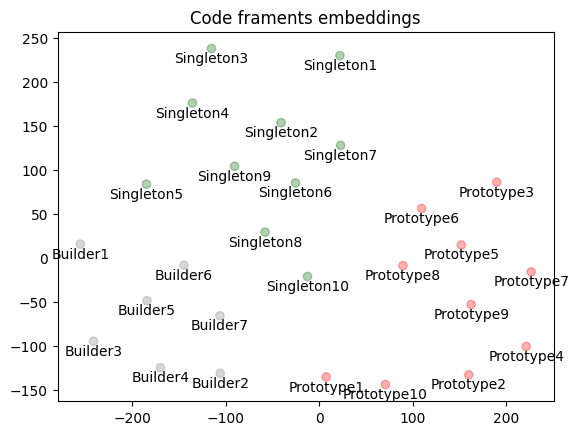

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkgreen","grey"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
rndperm = np.random.permutation(df.shape[0])
color_indices = df['Programs']
colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y,c=df["Singleton"], cmap=colormap, alpha=0.3)
for score in [0,1]:
  color = colors[score]
plt.title("Code framents embeddings")

# zip joins x and y coordinates in pairs
iIndex = 0
for x,y in vis_dims:

    label = df.iloc[iIndex].Programs
    iIndex +=1

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center') # horizontal align

The reduced dimention has been stored in a dataframe along with their classes Prototype, singelton or builder.

In [ ]:
d_array=pd.DataFrame(vis_dims, columns=['x','y'])
d_array['class'] =df['Singleton']
d_array

,x,y,class
0,22.079842,229.654770,1
1,-40.886993,153.506409,1
2,-115.291321,237.698410,1
3,-135.640396,175.805084,1
4,-184.895294,83.728233,1
5,-25.379967,85.123169,1
6,22.874655,127.779892,1
7,-57.906639,29.290556,1
8,-90.547890,104.021683,1
9,-12.643028,-21.055870,1


This chunk of code has been used to perform clustering. Code snippets below are similar but have been used to show the clusters in different forms.

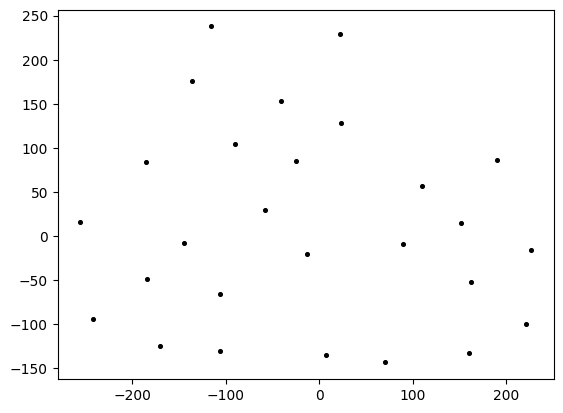

[[151.  64.]
 [ 58.  61.]
 [163.  37.]]


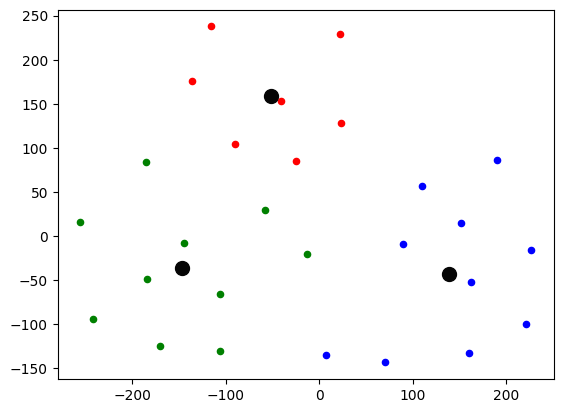

In [ ]:

from copy import deepcopy
# Getting the values and plotting it
f1 = d_array['x'].values
f2 = d_array['y'].values
X = np.array(list(zip(f1, f2)))
#plt.figure(8,5)
plt.scatter(f1, f2, c='black', s=7)
plt.show()
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], s=100, c='#050505')



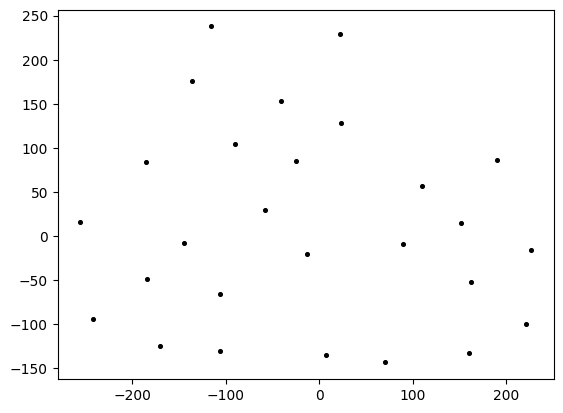

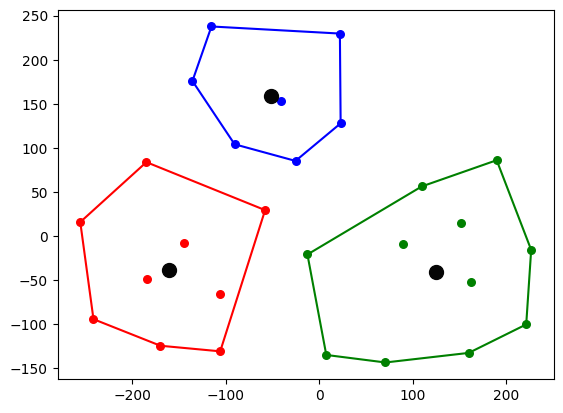

In [ ]:
from scipy.spatial import ConvexHull

# Getting the values and plotting it
f1 = d_array['x'].values
f2 = d_array['y'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    hull = ConvexHull(points)
    ax.scatter(points[:, 0], points[:, 1], s=30, c=colors[i])
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], colors[i])

ax.scatter(C[:, 0], C[:, 1], s=100, c='#050505')
plt.show()


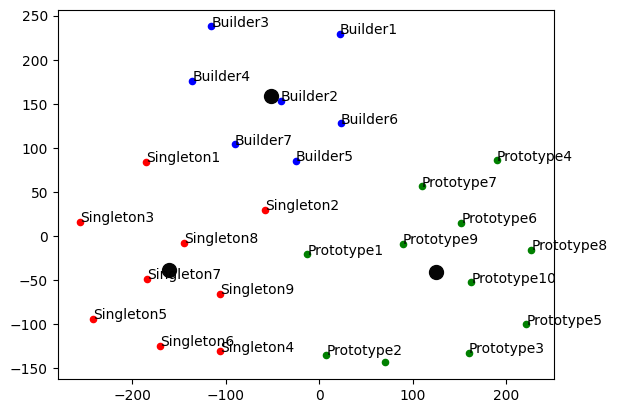

In [ ]:
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=20, c=colors[i])
    for j in range(len(points)):
        if i == 0 and j < 10:
            label = 'Singleton{}'.format(j+1)
        elif i == 1 and j < 10:
            label = 'Prototype{}'.format(j+1)
        elif i == 2 and j < 7:
            label = 'Builder{}'.format(j+1)
        else:
            label = None
        if label:
            ax.annotate(label, (points[j][0], points[j][1]))
ax.scatter(C[:, 0], C[:, 1], s=100, c='#050505')


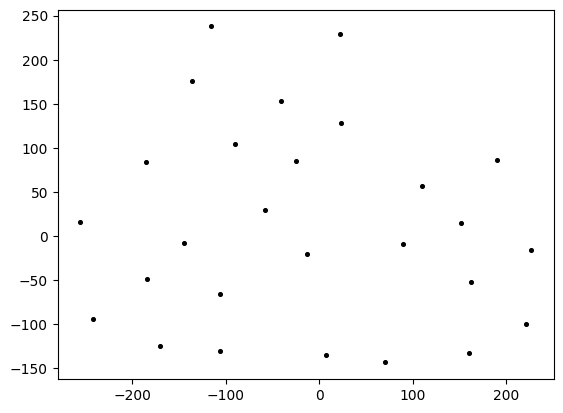

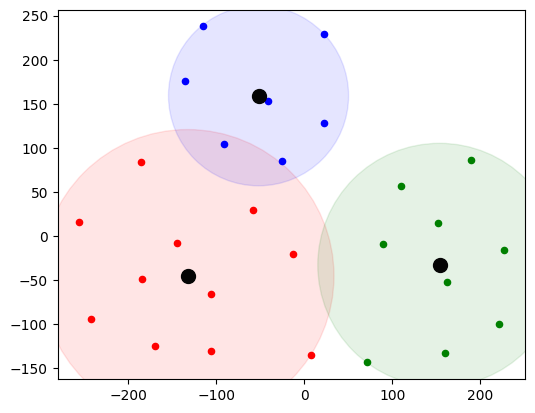

In [ ]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

# Getting the values and plotting it
f1 = d_array['x'].values
f2 = d_array['y'].values
X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    circle_radius = np.max(dist(points, C[i]))
    circle = plt.Circle((C[i][0], C[i][1]), circle_radius, color=colors[i], alpha=0.1)
    ax.add_artist(circle)
    ax.scatter(points[:, 0], points[:, 1], s=20, c=colors[i])

ax.scatter(C[:, 0], C[:, 1], s=100, c='#050505')
ax.set_aspect('equal', adjustable='box')
plt.show()


PCA dimensity reduction

In [ ]:
from sklearn.decomposition import PCA

pcaComp = PCA(n_components=2,
              random_state=42)

vis_dims = pcaComp.fit_transform(arr)
vis_dims.shape

(27, 2)

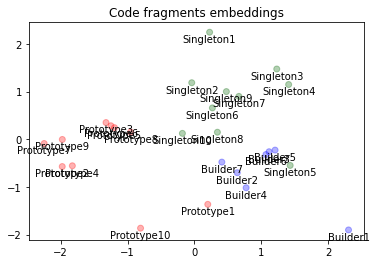

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkgreen","blue"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]


colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y,c=df["Singleton"], cmap=colormap, alpha=0.3)
for score in [0,1]:
    color = colors[score]
plt.title("Code fragments embeddings")
plt.rcParams['figure.figsize'] = (5,5)

# zip joins x and y coordinates in pairs
iIndex = 0
for x,y in vis_dims:
  label = df.iloc[iIndex].Programs
  iIndex +=1

  plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,-10), # distance from text to points (x,y)
                ha='center') 